### **Modelo de Comparación (SF-ID-Network-For-NLU)**

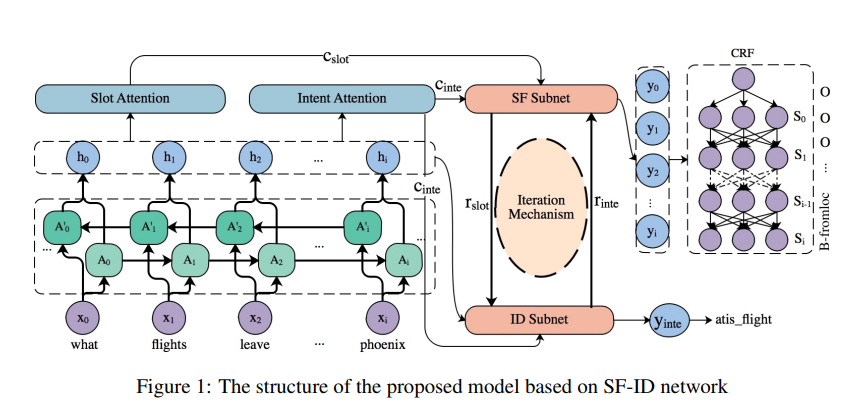

Este modelo utiliza el mecanismo de atención tanto para las entidades y las intenciones. Además presenta dos subredes para las intenciones y entidades, para las entidades se adiciona una capa de campo aleatorio condicional para el etiquetado de las secuencias.

### **Instalación**

In [ ]:
% pwd

'/content'

In [ ]:
# Nos ubicamos en la ruta del proyecto

% cd /content/drive/MyDrive/CLASES/PUCP/2.Clases/Ciclo-II-DL/Proyecto-DL/JoinIntentDetectionSlotFilling/Entregables/Entregable03/SF-ID-Network-For-NLU/

/content/drive/MyDrive/CLASES/PUCP/2.Clases/Ciclo-II-DL/Proyecto-DL/JoinIntentDetectionSlotFilling/Entregables/Entregable03/SF-ID-Network-For-NLU


In [ ]:
# Clonamos el 
# Proyecto de referencia : https://github.com/ZephyrChenzf/SF-ID-Network-For-NLU
# Paper: https://arxiv.org/abs/1907.00390

!git clone https://github.com/ZephyrChenzf/SF-ID-Network-For-NLU.git

Cloning into 'SF-ID-Network-For-NLU'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 87 (delta 0), reused 0 (delta 0), pack-reused 84
^C


In [ ]:
# Nos ubicamos en la ruta del proyecto clonado
% cd SF-ID-Network-For-NLU/

/content/drive/MyDrive/CLASES/PUCP/2.Clases/Ciclo-II-DL/Proyecto-DL/JoinIntentDetectionSlotFilling/Entregables/Entregable03/SF-ID-Network-For-NLU/SF-ID-Network-For-NLU


In [ ]:
# Instalamos los requerimienetos iniciales, para este proyecto se usa la  version 1.15 de tensorflow 
!python -m pip install --user --upgrade tensorflow==1.15

     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 503 kB 55.8 MB/s 
     |████████████████████████████████| 3.8 MB 54.8 MB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=5816228539a2ca384a945a154a17df7c20b1426a97af12b6f95237585563c8b7
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is in

In [ ]:
# Verificamos la version de tensorflow
import tensorflow as tf
print(tf.__version__)

1.15.0


### **Uso y Resultados**

In [12]:
# Verificamos los parámetros disponibles para el entrenamiento
! python train.py -h

usage: train.py [-h] [--num_units LAYER_SIZE] [--model_type MODEL_TYPE]
                [--priority_order PRIORITY_ORDER] [--use_crf USE_CRF]
                [--use_embedding USE_EMBEDDING] [--cell CELL]
                [--iteration_num ITERATION_NUM] [--batch_size BATCH_SIZE]
                [--batch_size_add BATCH_SIZE_ADD] [--max_epochs MAX_EPOCHS]
                [--no_early_stop] [--patience PATIENCE]
                [--learning_rate_decay LEARNING_RATE_DECAY]
                [--learning_rate LEARNING_RATE] [--decay_steps DECAY_STEPS]
                [--decay_rate DECAY_RATE] [--dataset DATASET]
                [--model_path MODEL_PATH] [--vocab_path VOCAB_PATH]
                [--train_data_path TRAIN_DATA_PATH]
                [--test_data_path TEST_DATA_PATH]
                [--valid_data_path VALID_DATA_PATH] [--input_file INPUT_FILE]
                [--slot_file SLOT_FILE] [--intent_file INTENT_FILE]
                [--embedding_path EMBEDDING_PATH]

optional arguments:
  -h,

In [11]:
# Ejecutamos el entrenamiento
# Dataset: atis
# Prioridad: slots
# Usa CRF para el etiquetado de las secuencias
# Num. de épocas: 50
# Tamaño de batch: 32

! python train.py --dataset=atis --priority_order=slot_first --use_crf=True --max_epochs=50 --batch_size=32

# Mejores Resultados:
'''
Step: 2173
Epochs: 44
Loss: 0.29171119833534415
Valid:
slot f1: 96.96969696969698
intent accuracy: 97.2
semantic Acc(intent, slots are all correct): 88.2
Test:
slot f1: 94.86235314746625
intent accuracy: 97.42441209406495
semantic Acc(intent, slots are all correct): 84.77043673012318
best epoch_num :  44
INFO : best score : 84.77043673012318
'''

batch_size = 32
batch_size_add = 4
cell = lstm
dataset = atis
decay_rate = 0.9
decay_steps = 1120
early_stop = True
embedding_path = 
input_file = seq.in
intent_file = label
iteration_num = 1
layer_size = 64
learning_rate = 0.001
learning_rate_decay = 1
max_epochs = 50
model_path = ./model
model_type = intent_only
patience = 15
priority_order = slot_first
slot_file = seq.out
test_data_path = test
train_data_path = train
use_crf = True
use_embedding = 1
valid_data_path = valid
vocab_path = ./vocab

use atis dataset


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in T